In [ ]:
dataset_path='/content/drive/MyDrive/Project 3'
import os

for split in ['train', 'valid', 'test']:
    img_dir = os.path.join(dataset_path, split, 'images')
    lbl_dir = os.path.join(dataset_path, split, 'labels')

    num_images = len(os.listdir(img_dir))
    num_labels = len(os.listdir(lbl_dir))

    print(f"{split.upper()} SET -> Images: {num_images}, Labels: {num_labels}")


TRAIN SET -> Images: 3946, Labels: 3946
VALID SET -> Images: 493, Labels: 493
TEST SET -> Images: 494, Labels: 494


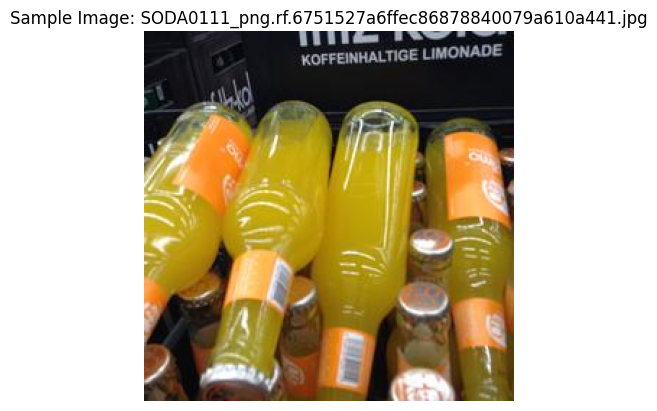

Label Content:
18 0.87109375 0.611328125 0.2421875 0.76953125
18 0.599609375 0.587890625 0.2890625 0.81640625
18 0.328125 0.583984375 0.3515625 0.8203125
18 0.140625 0.53125 0.2734375 0.6953125


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

sample_image = os.path.join(dataset_path, 'train/images')  # Choose a sample file
sample_file = os.listdir(sample_image)[0]

img_path = os.path.join(dataset_path, 'train/images', sample_file)
label_path = img_path.replace("images", "labels").replace(".jpg", ".txt").replace(".png", ".txt")

img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")
plt.title(f"Sample Image: {sample_file}")
plt.show()

with open(label_path) as f:
    print("Label Content:")
    print(f.read())


In [6]:
from ultralytics import YOLO


In [7]:
model=YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 283MB/s]


In [8]:
model.train(
    data='/content/drive/MyDrive/Project 3/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='yolov8_freiberg',
    workers=2
)

Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Project 3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=yolov8_freiberg, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 91.5MB/s]


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 269MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Project 3/train/labels... 3946 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3946/3946 [44:47<00:00,  1.47it/s]


train: New cache created: /content/drive/MyDrive/Project 3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Project 3/valid/labels... 493 images, 0 backgrounds, 0 corrupt: 100%|██████████| 493/493 [05:40<00:00,  1.45it/s]


val: New cache created: /content/drive/MyDrive/Project 3/valid/labels.cache
Plotting labels to runs/detect/yolov8_freiberg/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_freiberg
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.16G     0.9465      3.776      1.334         42        640: 100%|██████████| 247/247 [01:33<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.34it/s]

                   all        493       1178      0.199      0.264      0.102     0.0706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.64G     0.9129       3.06      1.307         62        640: 100%|██████████| 247/247 [01:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.10it/s]


                   all        493       1178      0.173       0.34      0.206      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.66G     0.8893      2.668      1.265         46        640: 100%|██████████| 247/247 [01:27<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.40it/s]


                   all        493       1178       0.27      0.352      0.257      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.69G     0.8684       2.37      1.235         39        640: 100%|██████████| 247/247 [01:29<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.76it/s]

                   all        493       1178      0.394      0.471      0.412      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.7G     0.8319      2.118       1.19         52        640: 100%|██████████| 247/247 [01:28<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.11it/s]

                   all        493       1178      0.441      0.491      0.457      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.72G      0.825      2.001      1.188         34        640: 100%|██████████| 247/247 [01:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.22it/s]

                   all        493       1178      0.461      0.523       0.49      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.73G     0.8052      1.852       1.17         41        640: 100%|██████████| 247/247 [01:27<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.61it/s]

                   all        493       1178      0.554      0.536      0.566      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.76G     0.7936      1.751      1.162         47        640: 100%|██████████| 247/247 [01:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.22it/s]


                   all        493       1178      0.618      0.561      0.616      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.77G     0.7877       1.68      1.153         52        640: 100%|██████████| 247/247 [01:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.20it/s]

                   all        493       1178      0.613      0.589      0.645      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.79G     0.7691      1.609      1.143         45        640: 100%|██████████| 247/247 [01:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.86it/s]


                   all        493       1178      0.705       0.58      0.677      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.8G     0.7661      1.538      1.138         50        640: 100%|██████████| 247/247 [01:28<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.56it/s]


                   all        493       1178      0.727      0.634      0.718      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.82G     0.7583      1.485      1.134         52        640: 100%|██████████| 247/247 [01:31<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.05it/s]

                   all        493       1178      0.634      0.659      0.706      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.84G      0.757      1.445      1.127         43        640: 100%|██████████| 247/247 [01:29<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.18it/s]


                   all        493       1178      0.691      0.646      0.728      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.86G     0.7459      1.383      1.126         47        640: 100%|██████████| 247/247 [01:26<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.79it/s]


                   all        493       1178      0.742      0.682      0.769      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.86G     0.7467      1.354      1.118         65        640: 100%|██████████| 247/247 [01:27<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.60it/s]


                   all        493       1178       0.75      0.645      0.763       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.89G      0.735      1.293      1.108         64        640: 100%|██████████| 247/247 [01:28<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.25it/s]


                   all        493       1178      0.698        0.7      0.738      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.91G      0.728       1.28      1.112         56        640: 100%|██████████| 247/247 [01:28<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.52it/s]

                   all        493       1178      0.716      0.667      0.754        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.93G      0.725      1.236      1.097         44        640: 100%|██████████| 247/247 [01:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.71it/s]


                   all        493       1178      0.787      0.675      0.786      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.93G     0.7194      1.198      1.099         41        640: 100%|██████████| 247/247 [01:33<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.78it/s]


                   all        493       1178      0.745      0.701      0.789      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.96G     0.7126      1.155      1.093         47        640: 100%|██████████| 247/247 [01:28<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.28it/s]

                   all        493       1178      0.794      0.694      0.787      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.98G     0.6993      1.137      1.089         45        640: 100%|██████████| 247/247 [01:27<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.23it/s]

                   all        493       1178      0.764       0.74      0.804      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.99G      0.699      1.112      1.089         54        640: 100%|██████████| 247/247 [01:29<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.40it/s]

                   all        493       1178      0.809      0.709      0.812      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         3G     0.6985       1.08      1.088         58        640: 100%|██████████| 247/247 [01:31<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.70it/s]


                   all        493       1178      0.781      0.741      0.817      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.03G     0.6849      1.053       1.08         49        640: 100%|██████████| 247/247 [01:27<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.38it/s]


                   all        493       1178      0.782      0.739      0.819      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.04G     0.6856       1.04      1.078         52        640: 100%|██████████| 247/247 [01:31<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.01it/s]

                   all        493       1178       0.81       0.73      0.832      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.06G     0.6802      1.013      1.073         37        640: 100%|██████████| 247/247 [01:30<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.14it/s]


                   all        493       1178       0.78      0.728       0.82      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.07G     0.6754      0.994      1.074         37        640: 100%|██████████| 247/247 [01:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.94it/s]


                   all        493       1178      0.808      0.765       0.84      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       3.1G     0.6717     0.9815       1.07         39        640: 100%|██████████| 247/247 [01:33<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.02it/s]

                   all        493       1178      0.816      0.754      0.851      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.11G     0.6669     0.9633      1.068         43        640: 100%|██████████| 247/247 [01:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.40it/s]

                   all        493       1178      0.766      0.791      0.846      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.13G     0.6595     0.9461      1.066         44        640: 100%|██████████| 247/247 [01:33<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.04it/s]


                   all        493       1178      0.812      0.777       0.85        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.14G     0.6634     0.9415      1.063         55        640: 100%|██████████| 247/247 [01:35<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]

                   all        493       1178      0.792      0.759      0.834      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.16G     0.6573     0.9296       1.06         47        640: 100%|██████████| 247/247 [01:32<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.17it/s]


                   all        493       1178      0.844      0.769      0.856      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.18G     0.6517     0.8928      1.056         52        640: 100%|██████████| 247/247 [01:34<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.97it/s]


                   all        493       1178      0.791       0.79      0.856      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       3.2G     0.6516     0.8962      1.058         43        640: 100%|██████████| 247/247 [01:33<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.25it/s]


                   all        493       1178      0.844      0.777      0.868      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.21G     0.6462     0.8641      1.049         44        640: 100%|██████████| 247/247 [01:29<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.11it/s]


                   all        493       1178      0.839      0.763       0.86       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.23G     0.6443     0.8608      1.051         38        640: 100%|██████████| 247/247 [01:27<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]


                   all        493       1178      0.815      0.779      0.862      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.25G     0.6382     0.8492      1.051         41        640: 100%|██████████| 247/247 [01:32<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.63it/s]


                   all        493       1178      0.838      0.765      0.867      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.27G     0.6347     0.8244      1.044         42        640: 100%|██████████| 247/247 [01:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.61it/s]


                   all        493       1178      0.799        0.8      0.863      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.27G     0.6333     0.8183      1.047         40        640: 100%|██████████| 247/247 [01:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.17it/s]


                   all        493       1178      0.852       0.75      0.867      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       3.3G     0.6246      0.801       1.04         41        640: 100%|██████████| 247/247 [01:38<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.12it/s]

                   all        493       1178      0.822      0.796       0.87      0.723


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.32G     0.5741      0.644      1.047         21        640: 100%|██████████| 247/247 [01:29<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.99it/s]

                   all        493       1178      0.861      0.772      0.871      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.34G     0.5499     0.5782      1.022         19        640: 100%|██████████| 247/247 [01:26<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.43it/s]


                   all        493       1178      0.861      0.791      0.876      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.34G     0.5485     0.5762      1.025         24        640: 100%|██████████| 247/247 [01:23<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.22it/s]


                   all        493       1178      0.861       0.78       0.87       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.37G       0.54     0.5512      1.016         30        640: 100%|██████████| 247/247 [01:28<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.29it/s]

                   all        493       1178      0.865       0.78      0.876      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.38G     0.5347     0.5422      1.009         22        640: 100%|██████████| 247/247 [01:27<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.71it/s]


                   all        493       1178       0.86      0.791      0.876      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       3.4G       0.53     0.5334      1.009         22        640: 100%|██████████| 247/247 [01:24<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.23it/s]


                   all        493       1178      0.853      0.795      0.876      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.41G     0.5247     0.5162      1.006         21        640: 100%|██████████| 247/247 [01:24<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.57it/s]


                   all        493       1178      0.851      0.804      0.877      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.44G     0.5203     0.5025      1.003         21        640: 100%|██████████| 247/247 [01:25<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.18it/s]

                   all        493       1178      0.864      0.792      0.879       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.46G     0.5164     0.4908          1         23        640: 100%|██████████| 247/247 [01:25<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.73it/s]


                   all        493       1178      0.865      0.797       0.88      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.47G     0.5184     0.4996          1         22        640: 100%|██████████| 247/247 [01:22<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.41it/s]

                   all        493       1178      0.872      0.787       0.88      0.732



50 epochs completed in 1.345 hours.
Optimizer stripped from runs/detect/yolov8_freiberg/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolov8_freiberg/weights/best.pt, 6.3MB

Validating runs/detect/yolov8_freiberg/weights/best.pt...
Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.89it/s]


                   all        493       1178      0.871      0.787      0.879      0.732
                 beans         13         32      0.962      0.812      0.915      0.774
                  cake         20         33      0.872      0.826      0.888      0.774
                 candy         27         42      0.876      0.674      0.799       0.61
                cereal         29         56      0.863      0.804      0.875      0.754
                 chips         24         45      0.829      0.733      0.872      0.641
             chocolate         33         82       0.79      0.537      0.675      0.501
                coffee         29         79      0.842      0.823      0.878      0.745
                  corn         11         41      0.906      0.936      0.969      0.863
                  fish         13         30      0.926      0.832      0.905      0.744
                 flour         13         23      0.742      0.478      0.751      0.709
                 hone

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78679b344210>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,  

In [10]:
import shutil
source = '/content/runs/detect/yolov8_freiberg/weights/best.pt'
destination = '/content/drive/MyDrive/Project 3/best.pt'
shutil.copy(source, destination)
print("Model successfully saved to Google Drive 🟢")



Model successfully saved to Google Drive 🟢
